In [1]:
pwd

'/projects/sccn/andromeda1/aglinska/BC-ABCD-denoise/Code'

In [2]:
!date

Tue Jul 29 04:11:09 PM EDT 2025


In [3]:
import os
import numpy as np
import pandas as pd
import ants

from matplotlib import pyplot as plt
from scipy.stats import ttest_rel

In [4]:
indir = '../Data/StudyForrest/fmriprep/'
subs = [s for s in os.listdir(indir) if all((s.startswith('sub'),not s.endswith('.html')))]
subs.sort()
print(len(subs))

14


In [5]:
ofdir_root = '../Data/StudyForrest/ensembles_last_CVAE'
analysis_name = 'refactored-forrest-v3'
analysis_name = 'refac-baseline-forrest-v1'
ofdir = os.path.join(ofdir_root,analysis_name)

In [6]:
fn_temp = 'contrast_face_{s}_R{r}_deepcor.nii.gz'

In [7]:
def plot_scatter(vec1,vec2,xlabel='',ylabel='',title=''):
    plt.scatter(vec1, vec2, color='blue', label='Data points',s=150)
    f = 20
    plt.xticks(fontsize=f)
    plt.yticks(fontsize=f)

    # Adding the parity line (where y = x)
    # Determine the limits for the line based on the data range:
    min_val = min(np.min(vec1), np.min(vec2))
    max_val = max(np.max(vec1), np.max(vec2))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Parity line (y=x)')

    # Add labels and title
    plt.xlabel(xlabel,fontsize=16,fontweight='bold')
    plt.ylabel(ylabel,fontsize=16,fontweight='bold')
    plt.title(title,fontsize=16,fontweight='bold')
    plt.grid(True)

In [8]:
def pretty_t_test(vec1,vec2,ttl,alternative='two-sided'):
    from scipy.stats import ttest_rel
    
    #t,p = ttest_rel(np.arctanh(vec1),np.arctanh(vec2),alternative=alternative) # Fisher Z transform before t-testing
    t,p = ttest_rel(vec1,vec2,alternative=alternative) # Fisher Z transform before t-testing
    
    degf = len(vec1)-1
    diff = vec1.mean()-vec2.mean()

    if p < .001:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p < .001')
    else:
        print(f'{ttl} ΔM={diff:.3f}, t({int(degf)}) = {t:.2f}, p = {p:.3f}')

In [9]:
def get_roi_data(im_fn,roi_fn):
    roi = ants.image_read(roi_fn)
    im = ants.image_read(im_fn)

    roi_data = im.numpy()[roi.numpy()==1].mean()
    return roi_data

In [10]:
rvec = [1,2,3,4]

correlation:face reg: DeepCor > Preproc ΔM=0.014, t(13) = 1.14, p = 0.275
correlation:face reg: DeepCor > CompCor ΔM=-0.003, t(13) = -0.25, p = 0.803


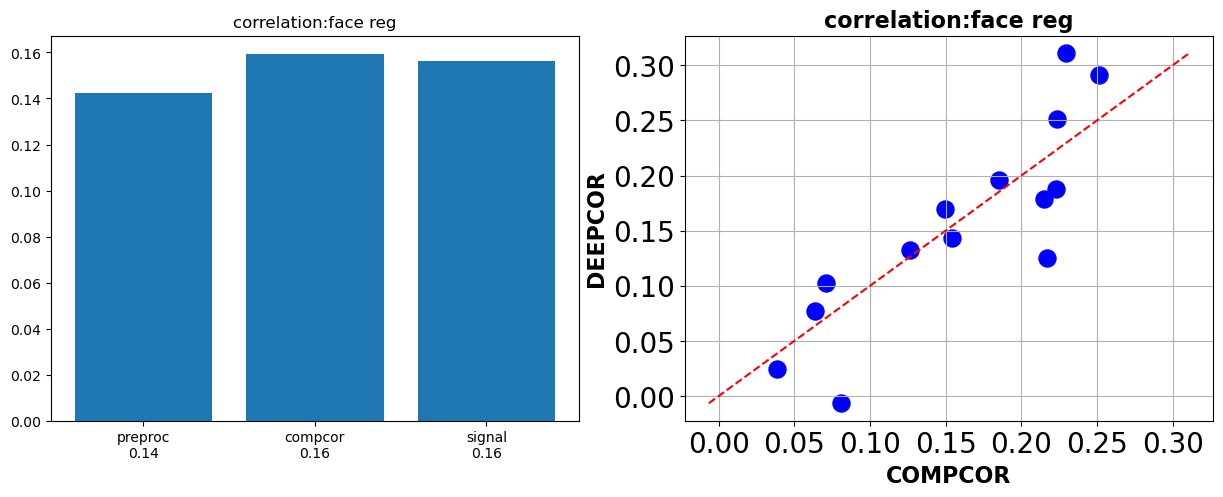

In [11]:
fn_temp = 'corr2face_S{s}_R{r}_{kind}.nii.gz'
roi_fn_temp = '../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'
title = 'correlation:face reg'

kind = 'deepcor'
roi_data_deepcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'preproc'
roi_data_preproc = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'compcor'
roi_data_compcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

## Plot BAR
ys = [roi_data_preproc.mean(axis=0).mean(),
roi_data_compcor.mean(axis=0).mean(),
roi_data_deepcor.mean(axis=0).mean()]

xs = [0,1,2];
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(xs,ys);
plt.xticks(xs,labels=[f'preproc\n{ys[0]:.2f}',f'compcor\n{ys[1]:.2f}',f'signal\n{ys[2]:.2f}']);
plt.title(title)

pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_preproc.mean(axis=0),ttl=f'{title}: DeepCor > Preproc')
pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_compcor.mean(axis=0),ttl=f'{title}: DeepCor > CompCor')
plt.subplot(1,2,2)
plot_scatter(vec1=roi_data_compcor.mean(axis=0),vec2=roi_data_deepcor.mean(axis=0),xlabel='COMPCOR',ylabel='DEEPCOR',title=title)

contrast:face: DeepCor > Preproc ΔM=-0.565, t(13) = -3.83, p = 0.002
contrast:face: DeepCor > CompCor ΔM=-0.706, t(13) = -3.79, p = 0.002


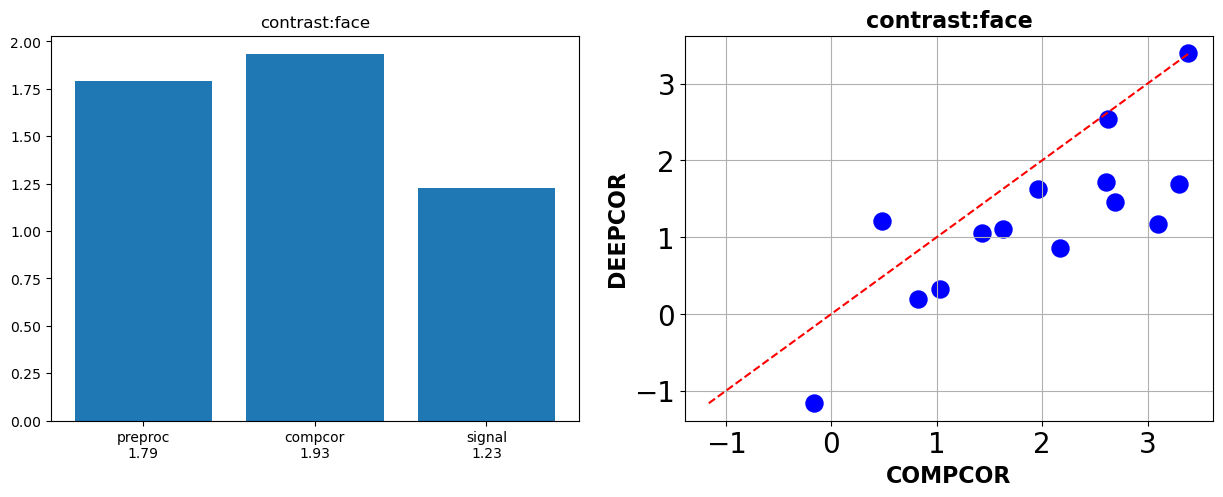

In [12]:
fn_temp = 'contrast_face_{s}_R{r}_{kind}.nii.gz'
roi_fn_temp = '../Data/StudyForrest/ROIs/rFFA_final_mask_{sub}_bin.nii.gz'
title = 'contrast:face'

kind = 'deepcor'
roi_data_deepcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'preproc'
roi_data_preproc = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'compcor'
roi_data_compcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

## Plot BAR
ys = [roi_data_preproc.mean(axis=0).mean(),
roi_data_compcor.mean(axis=0).mean(),
roi_data_deepcor.mean(axis=0).mean()]

xs = [0,1,2];
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(xs,ys);
plt.xticks(xs,labels=[f'preproc\n{ys[0]:.2f}',f'compcor\n{ys[1]:.2f}',f'signal\n{ys[2]:.2f}']);
plt.title(title)

pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_preproc.mean(axis=0),ttl=f'{title}: DeepCor > Preproc')
pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_compcor.mean(axis=0),ttl=f'{title}: DeepCor > CompCor')
plt.subplot(1,2,2)
plot_scatter(vec1=roi_data_compcor.mean(axis=0),vec2=roi_data_deepcor.mean(axis=0),xlabel='COMPCOR',ylabel='DEEPCOR',title=title)

correlation:place reg: DeepCor > Preproc ΔM=0.079, t(13) = 5.18, p < .001
correlation:place reg: DeepCor > CompCor ΔM=0.062, t(13) = 3.20, p = 0.007


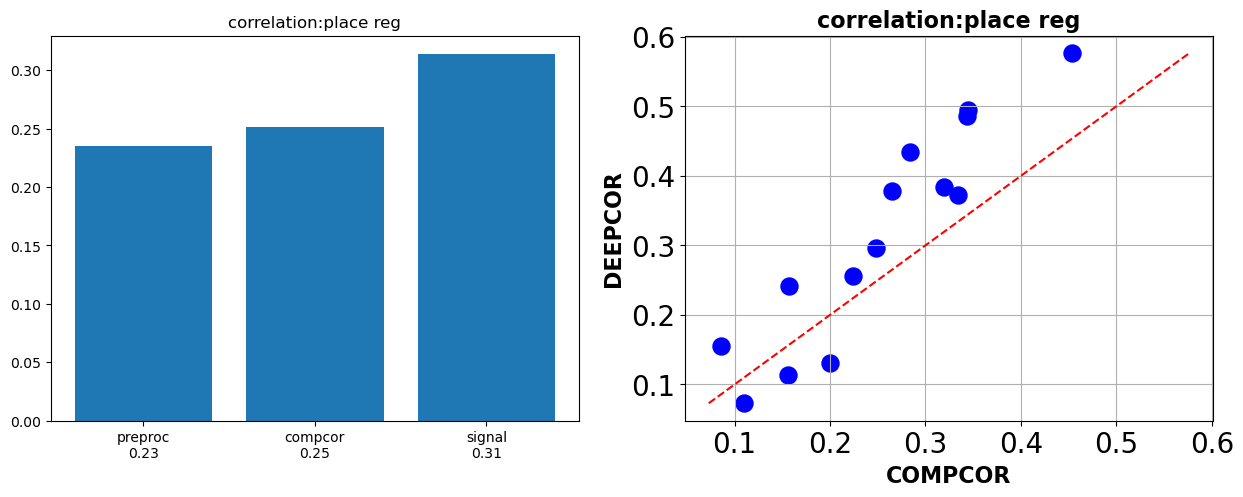

In [13]:
fn_temp = fn_temp = 'corr2place_S{s}_R{r}_{kind}.nii.gz'
roi_fn_temp = '../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'
title = 'correlation:place reg'

kind = 'deepcor'
roi_data_deepcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'preproc'
roi_data_preproc = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'compcor'
roi_data_compcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

## Plot BAR
ys = [roi_data_preproc.mean(axis=0).mean(),
roi_data_compcor.mean(axis=0).mean(),
roi_data_deepcor.mean(axis=0).mean()]

xs = [0,1,2];
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(xs,ys);
plt.xticks(xs,labels=[f'preproc\n{ys[0]:.2f}',f'compcor\n{ys[1]:.2f}',f'signal\n{ys[2]:.2f}']);
plt.title(title)

pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_preproc.mean(axis=0),ttl=f'{title}: DeepCor > Preproc')
pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_compcor.mean(axis=0),ttl=f'{title}: DeepCor > CompCor')
plt.subplot(1,2,2)
plot_scatter(vec1=roi_data_compcor.mean(axis=0),vec2=roi_data_deepcor.mean(axis=0),xlabel='COMPCOR',ylabel='DEEPCOR',title=title)

contrast:place: DeepCor > Preproc ΔM=0.399, t(13) = 2.89, p = 0.013
contrast:place: DeepCor > CompCor ΔM=0.221, t(13) = 1.27, p = 0.226


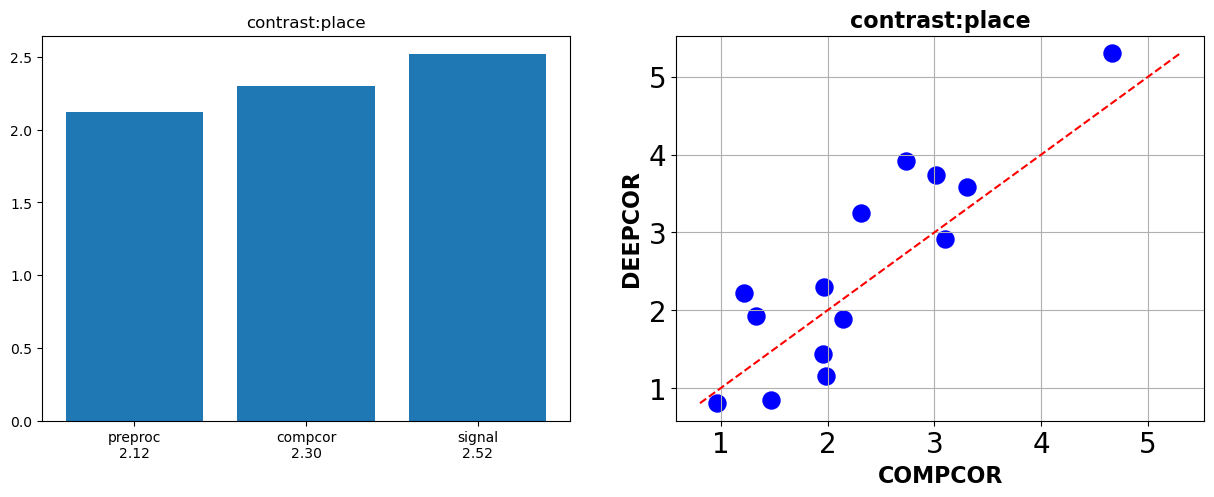

In [14]:
fn_temp = 'contrast_place_S{s}_R{r}_{kind}.nii.gz'
roi_fn_temp = '../Data/StudyForrest/ROIs/rPPA_final_mask_{sub}_bin.nii.gz'
title = 'contrast:place'


kind = 'deepcor'
roi_data_deepcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'preproc'
roi_data_preproc = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

kind = 'compcor'
roi_data_compcor = np.array([[get_roi_data(os.path.join(ofdir,fn_temp.format(s=s,r=r,kind=kind)),roi_fn_temp.format(sub=sub)) for s,sub in enumerate(subs)] for r in rvec])

## Plot BAR
ys = [roi_data_preproc.mean(axis=0).mean(),
roi_data_compcor.mean(axis=0).mean(),
roi_data_deepcor.mean(axis=0).mean()]

xs = [0,1,2];
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(xs,ys);
plt.xticks(xs,labels=[f'preproc\n{ys[0]:.2f}',f'compcor\n{ys[1]:.2f}',f'signal\n{ys[2]:.2f}']);
plt.title(title)

pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_preproc.mean(axis=0),ttl=f'{title}: DeepCor > Preproc')
pretty_t_test(roi_data_deepcor.mean(axis=0),roi_data_compcor.mean(axis=0),ttl=f'{title}: DeepCor > CompCor')
plt.subplot(1,2,2)
plot_scatter(vec1=roi_data_compcor.mean(axis=0),vec2=roi_data_deepcor.mean(axis=0),xlabel='COMPCOR',ylabel='DEEPCOR',title=title)